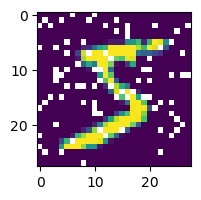

In [1]:
import os, sys
directory_path = os.path.dirname(os.path.abspath("__notebook__"))
sys.path.append('../../')
import numpy as np
np.random.seed(42)
import matplotlib.pyplot as plt
from models import rbm
from torchvision import datasets
from sklearn.preprocessing import StandardScaler

def add_random_nans(data, nan_probability):
    nan_mask = np.random.rand(*data.shape) < nan_probability
    data[nan_mask] = np.nan
    return data

train_dataset = datasets.MNIST(root='./data', train=True, download=True)
scaler = StandardScaler()
X = train_dataset.data.numpy()
n_examples = X.shape[0]
X = X.reshape(n_examples, -1)
X = scaler.fit_transform(X)
X = add_random_nans(X, 0.1)
y = train_dataset.targets.numpy()
plt.figure(figsize=(2, 2))
plt.imshow(scaler.inverse_transform(X[0].reshape(1, -1)).reshape(28, 28))

In [2]:
model = rbm.RBM(
    n_vis=784,
    n_hid=100
)
model.fit_autograd(
    X=X[:1000],
    n_gibbs=10,
    lr=0.001,
    n_epochs=100,
    batch_size=20,
    gamma=0.1,
    gamma_delay=50,
    rng_seed=0,
    verbose_interval=10,
    reduce_lr_on_plateau=True,
    checkpoint_path=f'{directory_path}/rbm_checkpoints/rbm_mnist_missing_demo.pth'
)

epoch: 010 of 100 | recon_loss: 0.6899999976158142
epoch: 020 of 100 | recon_loss: 0.6129999756813049
epoch: 030 of 100 | recon_loss: 0.5699999928474426
epoch: 040 of 100 | recon_loss: 0.5419999957084656
epoch: 050 of 100 | recon_loss: 0.5230000019073486
epoch: 060 of 100 | recon_loss: 0.5149999856948853
epoch: 070 of 100 | recon_loss: 0.5139999985694885
epoch: 080 of 100 | recon_loss: 0.5099999904632568
epoch: 090 of 100 | recon_loss: 0.5070000290870667
epoch: 100 of 100 | recon_loss: 0.5040000081062317


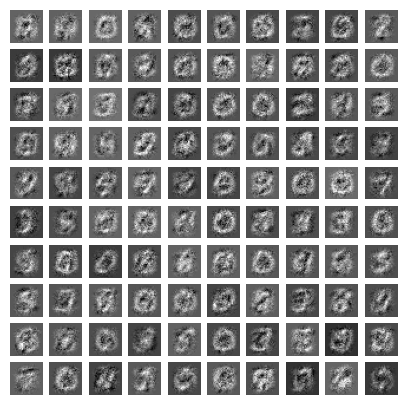

In [3]:
model = rbm.load(f'{directory_path}/rbm_checkpoints/rbm_mnist_missing_demo.pth')
samples = model.reconstruct(np.zeros((100, 784)), n_gibbs=200)
fig, axes = plt.subplots(10, 10, figsize=(5, 5))
axes = axes.flatten()
for i in range(100):
    axes[i].imshow(scaler.inverse_transform(samples[i].reshape(1, -1))\
                   .reshape(28, 28), cmap='gray')
    axes[i].axis('off')
plt.show()